<h1 style = "font-size:3rem;color:darkcyan"> Training a Neural Network </h1>

implementing backward propagation from scratch


In [10]:
# import libraries
import numpy as np
import math
from random import random
import matplotlib.pyplot as plt

In [238]:
class ANN:
    
    def __init__(self,n_inputs = 3, hidden_layer_sizes = [3,4], n_targets = 1):
        self.n_inputs = n_inputs
        self.hidden_layer_sizes = hidden_layer_sizes
        self.n_targets = n_targets
        
        layers = [self.n_inputs] + self.hidden_layer_sizes + [self.n_targets]
        print(layers)
        
        self.weights = [np.random.rand(layers[i], layers[i+1]) for i in range(len(layers)-1)]
        self.activations = [np.zeros(layers[i]) for i in range(len(layers))]
        self.derivatives = [np.zeros((layers[i], layers[i+1])) for i in range(len(layers)-1)]
        
    def _sigmoid(self, net_inputs):
        a = 1 / (1 + np.exp(-net_inputs))
        return a
    
    def _sigmoid_dh(self, x):
        da = x * (1.0 - x)
        return da
    
    def _activate(self, inputs, W):
        net_inputs = np.dot(inputs, W) # summation
        activation = self._sigmoid(net_inputs) # modulation
        return activation
    
    def _forward_propagate(self, inputs):
        activations = inputs
        self.activations[0] = activations
        for i in range(len(self.weights)):
            activations = self._activate(activations, self.weights[i])
            self.activations[i+1] = activations
        return activations
    
    def _back_propagate(self, error, verbose=False):
        # calculate error gradient
        
        for i in reversed(range(len(self.derivatives))):
            activations = self.activations[i+1]
            delta = error * self._sigmoid_dh(activations)
            delta_reshaped =  delta.reshape(delta.shape[0], -1).T
            current_activations = self.activations[i]
            current_activations_reshaped = current_activations.reshape(current_activations.shape[0], -1)
            self.derivatives[i] = np.dot(current_activations_reshaped, delta_reshaped)
            error = np.dot(delta, self.weights[i].T)
            
            if verbose:
                print(f'Derivatives for W[{i}] = {self.derivatives[i]}')
                
        return error
         
    def _gradient_descent(self, learning_rate):
        for i in range(len(self.weights)):
            # print(f'Original weights = {self.weights[i]}')
            self.weights[i] += self.derivatives[i] * learning_rate
            # print(f'Updated weights = {self.weights[i]}')
    
    def _mse(self, target, output):
        return np.average((target - output)**2)
    
    def train_neural_network(self, inputs, targets, learning_rate, max_epochs):
        #if np.array(inputs).size != self.n_inputs:
         #   print("Number of inputs does not match the input layer!")
          #  return None
        
        #if np.array(targets).size != self.n_targets:
       #     print("Number of targets does not match the output layer!")
         #   return None
        
        # repeat for max_epochs or when target error rate is achieved
        for i in range(max_epochs):
            sum_error = 0
            for x,target in zip(inputs, targets):
                # propagate forward
                output = self._forward_propagate(x)

                # calculate new error
                error = target - output

                # propagate backward
                self._back_propagate(error)

                # gradient descent
                self._gradient_descent(learning_rate)

                # calc sum error & print
                sum_error += self._mse(target, output)
            
            # print error after each epoch
            print(f'Error = {sum_error / len(inputs)} at epoch {i}')
        
        print(f'number of epochs exceeded ({i})')
        return self._forward_propagate(inputs)

In [241]:
ann = ANN(2, [5], 1)

[2, 5, 1]


In [242]:
learning_rate = 0.1
epochs = 50

inputs = np.array([[random() / 2 for _ in range(2)] for _ in range(1000)])
#inputs = np.array(np.random.rand(2, 10000))
targets = np.array([[i[0] + i[1]] for i in inputs])
#targets = inputs[0] + inputs[1]
#print(inputs[0,0] + inputs[0,1])
#print(targets[0])

In [243]:
out = ann.train_neural_network(inputs, targets, learning_rate, epochs)

Error = 0.04075580552921974 at epoch 0
Error = 0.03908268417976253 at epoch 1
Error = 0.038612565604135556 at epoch 2
Error = 0.038029670637000045 at epoch 3
Error = 0.03730311697333091 at epoch 4
Error = 0.036400746567687776 at epoch 5
Error = 0.03529097315794943 at epoch 6
Error = 0.03394586809623609 at epoch 7
Error = 0.03234556967220823 at epoch 8
Error = 0.030483809788957955 at epoch 9
Error = 0.028373750925969197 at epoch 10
Error = 0.02605244560515098 at epoch 11
Error = 0.023581520372379306 at epoch 12
Error = 0.021042055175419412 at epoch 13
Error = 0.01852369259603455 at epoch 14
Error = 0.01611094360050851 at epoch 15
Error = 0.013871316436867951 at epoch 16
Error = 0.011848858920481225 at epoch 17
Error = 0.010063858901393557 at epoch 18
Error = 0.008516962006078186 at epoch 19
Error = 0.007195125896764077 at epoch 20
Error = 0.006077372644268038 at epoch 21
Error = 0.005139306333133886 at epoch 22
Error = 0.004356173670604264 at epoch 23
Error = 0.0037046756270192453 at ep

In [244]:
print(targets[10])
print(out[10])

[0.68333614]
[0.68636766]


In [246]:
# predict data
inputs = [0.1, 0.3]
output = [0.4]
y_pred = ann._forward_propagate(inputs)
print(f'Actual value: {output}, predicted value: {y_pred}')
print(f'Error = {output - y_pred}')

Actual value: [0.4], predicted value: [0.40128996]
Error = [-0.00128996]


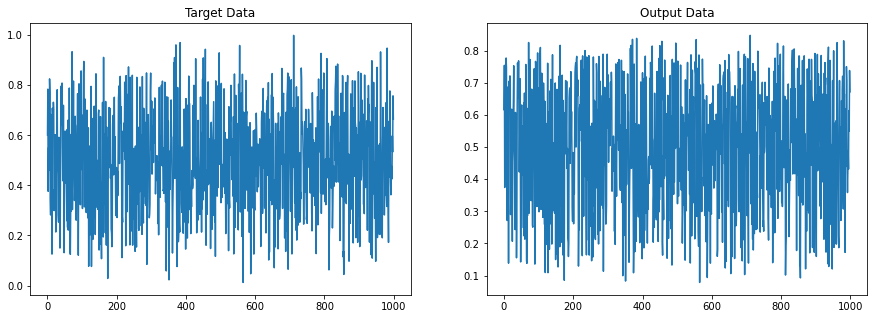

In [255]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Target Data')
plt.plot(targets)
plt.subplot(1,2,2)
plt.title('Output Data')
plt.plot(out)